# extracting dataset and plotting the dataset

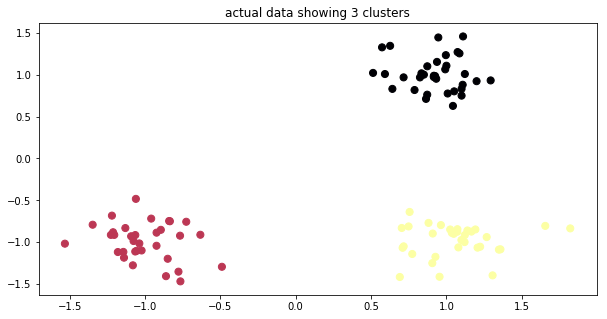

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
centers=[[1,1],[-1,-1],[1,-1]]
x,y = make_blobs(n_samples=100,centers=centers,random_state=2,cluster_std=0.2)
fig,ax=plt.subplots(figsize=(10,5))
ax.set_title("actual data showing 3 clusters")
ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap="inferno")




# defining the class 

In [9]:
class dbscan(object):
    def __init__(self,x,eps,min_pt):
        self.x=x
        self.eps=eps
        self.min_pt=min_pt
        '''initiating a daframe with cluster assigned to zero'''
    def df(self):
        d = {}
        d['Points']=list(self.x)
        d['Cluster']=0
        d1 = pd.DataFrame(d)
        return(d1)
    '''neighbour hood of points'''
    def neigh_point(self,p):
        n_points=[]
        for i in range(len(self.x)):
            a=np.linalg.norm(self.x[p]-self.x[i])
            if a<self.eps:
                n_points.append([self.x[p],i,a])
        return(pd.DataFrame(n_points,columns=["point1","neighbourhoods","distance"]))
    '''updating the clusters'''
    def update_cluster(self):
        cluster=0
        df1=self.df()
        for i in range(len(self.x)):
            v=self.neigh_point(i)
            if (df1.iloc[i,1]==0 and len(v)>=self.min_pt):
                cluster=cluster+1
                for j in v.iloc[:,1]:
                    df1.iloc[j,1]=cluster
            elif (df1.iloc[i,1]==0 and len(v)<self.min_pt):
                    df1.iloc[i,1]=-1
        return(df1.iloc[:,1])

# finding the clusters

In [14]:
c=dbscan(x,1,10)
print(list(c.update_cluster()))

[1, 2, 1, 2, 3, 1, 1, 2, 1, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 1, 3, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 1, 3]


# plotting the new clusters

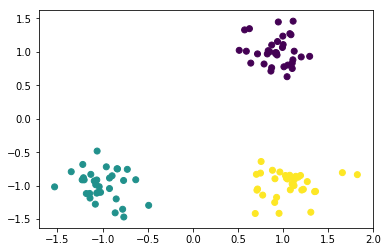

In [15]:
plt.scatter(x[:,0],x[:,1],c=c.update_cluster())